In [1]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
%matplotlib inline

from qiskit.visualization import *
simulator = Aer.get_backend('qasm_simulator')

from qiskit.compiler import transpile,assemble
from qiskit.tools.jupyter import *

{'0010': 100}


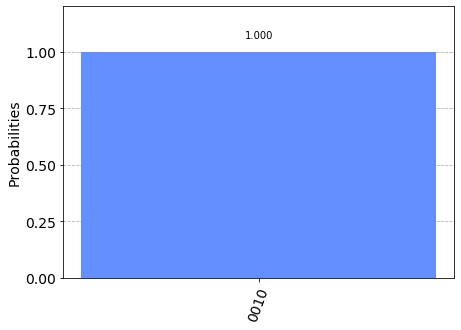

In [5]:
qi=QuantumRegister(1)
qs=QuantumRegister(2)
qxs=QuantumRegister(2)
qb=QuantumRegister(1)
qo=QuantumRegister(4)
c=ClassicalRegister(4)

circuit=QuantumCircuit(qi,qb,qs,qxs,qo,c)

def fun_or(qc,q0,q1,q2):
    qc.x(q0)
    qc.x(q1)
    qc.ccx(q0,q1,q2)
    qc.x(q2)
    qc.x(q1)
    qc.x(q0)
    
def or_3(qc,q0,q1,q2,b,q3):
    fun_or(qc,q0,q1,b)
    fun_or(qc,b,q2,q3)
    qc.reset(b)
    
def fun_and(qc,q0,q1,q2):
    qc.ccx(q0,q1,q2)

def and_3(qc,q0,q1,q2,b,q3):
    fun_and(qc,q0,q1,b)
    fun_and(qc,b,q2,q3)
    qc.reset(b)
    
def or_4(qc,q0,q1,q2,q3,b1,b2,q4):
    or_3(qc,q0,q1,q2,b1,b2)
    fun_or (qc,b2,q3,q4)
    qc.reset(b1)
    qc.reset(b2)
           
circuit.x(qi[0])
           
circuit.x(qs[1])
           
for i in range(0,2):
    circuit.cx(qs[i],qxs[i])
    circuit.x(qxs[i])
           
and_3(circuit,qxs[0],qxs[1],qi[0],qb[0],qo[0])
and_3(circuit,qs[0],qxs[1],qi[0],qb[0],qo[1])
and_3(circuit,qxs[0],qs[1],qi[0],qb[0],qo[2])
and_3(circuit,qs[0],qs[1],qi[0],qb[0],qo[3])
           
circuit.measure(qo[0],c[3])
circuit.measure(qo[1],c[2])          
circuit.measure(qo[2],c[1])
circuit.measure(qo[3],c[0])
           
job = execute(circuit,simulator,shots=100)
result=job.result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)           

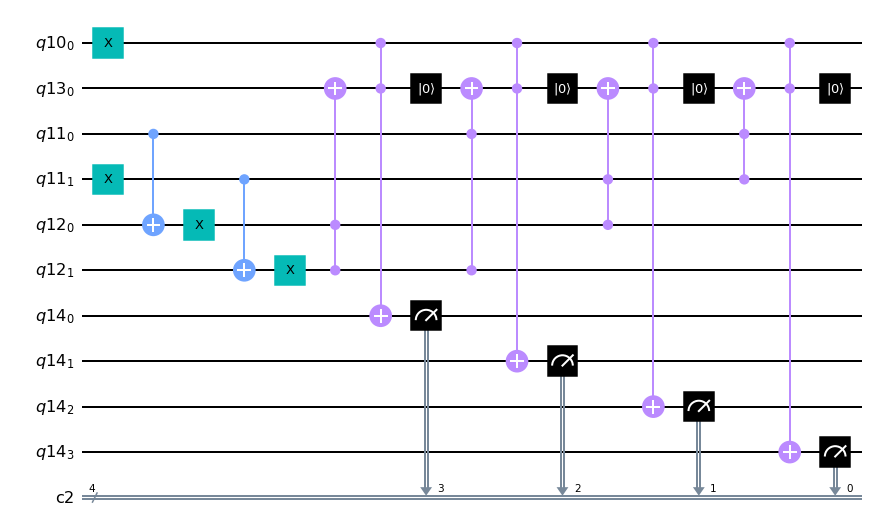

In [6]:
circuit.draw(output="mpl")

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

C:\Users\Hrithik\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [3]:
qi=QuantumRegister(1)
qs=QuantumRegister(2)
qxs=QuantumRegister(2)
qb=QuantumRegister(1)
qo=QuantumRegister(4)
c=ClassicalRegister(4)

circuit=QuantumCircuit(qi,qb,qs,qxs,qo,c)

def fun_or(qc,q0,q1,q2):
    qc.x(q0)
    qc.x(q1)
    qc.ccx(q0,q1,q2)
    qc.x(q2)
    qc.x(q1)
    qc.x(q0)
    
def or_3(qc,q0,q1,q2,b,q3):
    fun_or(qc,q0,q1,b)
    fun_or(qc,b,q2,q3)
    qc.reset(b)
    
def fun_and(qc,q0,q1,q2):
    qc.ccx(q0,q1,q2)

def and_3(qc,q0,q1,q2,b,q3):
    fun_and(qc,q0,q1,b)
    fun_and(qc,b,q2,q3)
    qc.reset(b)
    
def or_4(qc,q0,q1,q2,q3,b1,b2,q4):
    or_3(qc,q0,q1,q2,b1,b2)
    fun_or (qc,b2,q3,q4)
    qc.reset(b1)
    qc.reset(b2)
           
circuit.x(qi[0])
           
circuit.x(qs[1])
           
for i in range(0,2):
    circuit.cx(qs[i],qxs[i])
    circuit.x(qxs[i])
           
and_3(circuit,qxs[0],qxs[1],qi[0],qb[0],qo[0])
and_3(circuit,qs[0],qxs[1],qi[0],qb[0],qo[1])
and_3(circuit,qxs[0],qs[1],qi[0],qb[0],qo[2])
and_3(circuit,qs[0],qs[1],qi[0],qb[0],qo[3])
           
circuit.measure(qo[0],c[3])
circuit.measure(qo[1],c[2])          
circuit.measure(qo[2],c[1])
circuit.measure(qo[3],c[0])         

In [6]:
qcomp = provider.get_backend('ibmqx2')
job = execute(circuit,backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result= job.result()
return plot_histogram(result.get_counts(circuit))

TranspilerError: 'Number of qubits (10) in circuit8 is greater than maximum (5) in the coupling_map'